In [87]:
import pandas as pd
import numpy as np
import json
import plotly.express as px


## Exercise 1

First we load and take a look at the dataset

In [88]:
dessert_data = pd.read_json("data/dessert.json")
dessert_data.drop(["portions", "nutrients"],axis=1,inplace=True)
dessert_data.sample(10)



,id,description,tags,manufacturer,type
255,18398,"Pie crust, cookie-type, prepared from recipe, ...",[],None,Cake
59,18097,"Cake, chocolate, dry mix, pudding-type",[],,Cake
267,18420,"Cake, yellow, dry mix, regular, unenriched",[],,Cake
34,18057,"Banana bread, reduced-calorie, white",[],,Sweet Bread
353,18565,"ARCHWAY Home Style Cookies, Sugar Free Chocola...",[],Archway Cookies,Cookies
387,18947,"Pie crust, deep dish, frozen, baked, made with...",[],None,Cake
287,18457,"Crackers, saltines, fat-free, low-sodium",[],,Savory Bread
12,18027,"Bread, egg, marmelade",[],None,Sweet Bread
148,18227,"Crackers, rye, wafers, seasoned",[],,Savory Bread
72,18116,"Cake, gingerbread, prepared from recipe",[],None,Cake


### Exercise 1a)

We decided to replace empty Strings and `None` values with the string "No manufacturer" for the **Manufacturer** column:

In [89]:
dessert_data.replace("", None, inplace=True)
dessert_data.fillna(value="no Manufacturer",inplace=True)
dessert_data["manufacturer"].sample(40) 

320    Archway Cookies
111    no Manufacturer
62     no Manufacturer
257    no Manufacturer
16     no Manufacturer
65     no Manufacturer
107    no Manufacturer
373    no Manufacturer
97     no Manufacturer
118    no Manufacturer
225    no Manufacturer
380    no Manufacturer
156    no Manufacturer
117    no Manufacturer
120    no Manufacturer
90     no Manufacturer
366      Pillsbury Co.
108    no Manufacturer
199    no Manufacturer
329    Archway Cookies
293       Kellogg, Co.
341    Archway Cookies
187    no Manufacturer
292       Kellogg, Co.
198    no Manufacturer
201    no Manufacturer
325    Archway Cookies
371    no Manufacturer
330    Archway Cookies
244    no Manufacturer
73     no Manufacturer
352    Archway Cookies
121    no Manufacturer
279    no Manufacturer
11     no Manufacturer
382    no Manufacturer
301       Kellogg, Co.
173    no Manufacturer
54     no Manufacturer
41     no Manufacturer
Name: manufacturer, dtype: object

Next, we need to extract the contents of the lists in the **tags** column. We define a function to print the content of the list and return it:

In [90]:
def print_list(my_list):
    if len(my_list) > 0:
        count = 0
        for x in my_list:
            print(f"list value of element {count}: {x}")
            count += 1
    return my_list
dessert_data["tags"].map(print_list)

list value of element 0: Include commodity code B367
list value of element 0: Include commodity code B368
list value of element 0: Latino food
list value of element 0: Latino food


0                 []
1                 []
2                 []
3                 []
4                 []
           ...      
387               []
388               []
389               []
390    [Latino food]
391    [Latino food]
Name: tags, Length: 392, dtype: object

As you can see, we have only 4 list entries actually containing any tags in the entire column. And for those entries, the list has a length of 1, which means we can use a similiar function to extract the values from the list and return them as a string to the dataframe:

In [91]:
def extract_list_ele(my_list): #returns first content of list if non empty and "no Tags" otherwise
    if type(my_list) == list: # check if we are working on lists
        if len(my_list) == 0:
            return "no Tags"
        else:
            return my_list[0]
    else: #if not list, do nothing
        return my_list

dessert_data["tags"]=dessert_data["tags"].map(extract_list_ele)

dessert_data.sample(10)

,id,description,tags,manufacturer,type
129,18200,"Cookies, oatmeal, commercially prepared, speci...",no Tags,no Manufacturer,Cookies
177,18270,"Hush puppies, prepared from recipe",no Tags,no Manufacturer,Sweet Bread
355,18609,"KEEBLER, KEEBLER GOLDEN Vanilla Wafers, Artifi...",no Tags,"Keebler, Co.",Biscuits
331,18531,"ARCHWAY Home Style Cookies, Fruit & Honey Bar",no Tags,Archway Cookies,Cookies
268,18421,"Cookies, butter, commercially prepared, unenri...",no Tags,no Manufacturer,Cookies
48,18081,"Sweet bread spread, bread, dry mix",no Tags,no Manufacturer,Sweet Bread
233,18360,"Taco shells, baked",no Tags,no Manufacturer,Savory Bread
315,18509,"KELLOGG'S Pop-Tarts Pastry Swirls, Strawberry ...",no Tags,"Kellogg, Co.",Toaster Pastries
260,18403,"Waffles, plain, frozen, ready -to-heat, toasted",no Tags,no Manufacturer,Biscuits
93,18152,"Cookies, brownies, dry mix, regular",no Tags,no Manufacturer,Cookies


We need to consolidate different types of spellings in the `type` column:

In [92]:
dessert_data["type"].unique()

array(['Biscuits', 'Sweet Bread', 'Savory Bread', 'Sweet bread',
       'Sweet Breads', 'no Manufacturer', 'Cake', 'Cookies', 'Coookies',
       'Puff Pastry', 'Savory bread', 'Cream Puff', 'Muffins',
       'sweet bread', 'Muffin', 'Toaster Pastries', 'Muesli', 'Biscuit',
       'Cookie'], dtype=object)

In [93]:
dessert_data.replace("Sweet Breads", "Sweet Bread", inplace=True)
dessert_data.replace("sweet bread", "Sweet Bread", inplace=True)
dessert_data.replace("Sweet bread", "Sweet Bread", inplace=True)

dessert_data.replace("Cookies", "Cookie", inplace=True)
dessert_data.replace("Coookies", "Cookie", inplace=True)

dessert_data.replace("Biscuits", "Biscuit", inplace=True)

dessert_data.replace("Muffins", "Muffin", inplace=True)

dessert_data.replace("Savory bread", "Savory Bread", inplace=True)

Furthermore, we are going to flatten the `nutrients` and `portions` columns with `json_normalize()`:

In [94]:
with open("data/dessert.json") as json_file: 
    dessert_json = json.load(json_file)
    
dessert_data_port = pd.json_normalize(dessert_json, record_path=["portions"],meta=["id","type"],meta_prefix="origin-") # flatten json object into separate df
dessert_data_nutr = pd.json_normalize(dessert_json, record_path=["nutrients"],meta=["id","type"], meta_prefix="origin-") # flatten json object into separate df

since we are loading from the json, we need to consolidate `type` again:

In [95]:
dessert_data_nutr.replace("Sweet Breads", "Sweet Bread", inplace=True)
dessert_data_nutr.replace("sweet bread", "Sweet Bread", inplace=True)
dessert_data_nutr.replace("Sweet bread", "Sweet Bread", inplace=True)

dessert_data_nutr.replace("Cookies", "Cookie", inplace=True)
dessert_data_nutr.replace("Coookies", "Cookie", inplace=True)

dessert_data_nutr.replace("Biscuits", "Biscuit", inplace=True)

dessert_data_nutr.replace("Muffins", "Muffin", inplace=True)

dessert_data_nutr.replace("Savory bread", "Savory Bread", inplace=True)



dessert_data_port.replace("Sweet Breads", "Sweet Bread", inplace=True)
dessert_data_port.replace("sweet bread", "Sweet Bread", inplace=True)
dessert_data_port.replace("Sweet bread", "Sweet Bread", inplace=True)

dessert_data_port.replace("Cookies", "Cookie", inplace=True)
dessert_data_port.replace("Coookies", "Cookie", inplace=True)

dessert_data_port.replace("Biscuits", "Biscuit", inplace=True)

dessert_data_port.replace("Muffins", "Muffin", inplace=True)

dessert_data_port.replace("Savory bread", "Savory Bread", inplace=True)

lets look at the nutr table and check it for none types:

In [96]:
nutr_none =dessert_data_nutr[dessert_data_nutr["type"].isna()] #filter out all rows containing a None type val
nutr_none

,value,units,description,type,origin-id,origin-type
8443,0.078,mg,Vitamin B-6,None,18201,Cookie


We only have one single entry which is None, so we can overwrite it manually with the "Vitamin" type:

In [97]:
dessert_data_nutr.at[8443,"type"] = "Vitamins"
nutr_none =dessert_data_nutr[dessert_data_nutr["type"].isna()]
nutr_none #should be empty now

,value,units,description,type,origin-id,origin-type


Next, there is one negative value which we need to set to zero: 

In [98]:
dessert_data_nutr[dessert_data_nutr["value"]< 0]

,value,units,description,type,origin-id,origin-type
416,-88.0,mcg,"Folate, total",Vitamins,18017,Biscuit


In [99]:
dessert_data_nutr.at[416, "value"] = 0
dessert_data_nutr[dessert_data_nutr["value"]<0]

,value,units,description,type,origin-id,origin-type


### Exercise 1b)



In [100]:
#get unique dessert types
dessert_data["type"].unique()


array(['Biscuit', 'Sweet Bread', 'Savory Bread', 'no Manufacturer',
       'Cake', 'Cookie', 'Puff Pastry', 'Cream Puff', 'Muffin',
       'Toaster Pastries', 'Muesli'], dtype=object)

<AxesSubplot:>

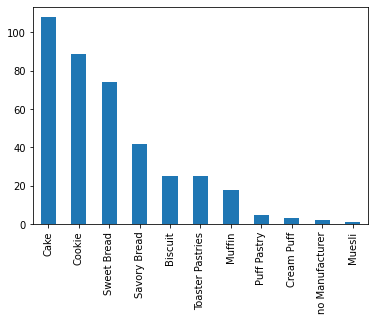

In [101]:
#get dessert type distribution
dessert_data["type"].value_counts().plot.bar()

### Exercise 1 c)

We need to display the median of vitamins by food type. In order to achieve this, we use the `groupby()` method:

In [102]:
nutr_temp = dessert_data_nutr.query('type.str.contains("Vitamins")', engine = 'python') # only keep entries with type Vitamins
nutr_temp.drop("origin-id",axis=1).groupby(["origin-type"]).median(True)

,value
origin-type,
Biscuit,1.075
Cake,0.360
Cookie,0.330
Cream Puff,2.405
Muesli,1.100
Muffin,0.502
Puff Pastry,0.469
Savory Bread,0.387
Sweet Bread,0.331


### Exercise 1 d)

We are tasked with detecting outliers in the amount of available vitamins with a some different methods. We are going to start with a box plot:

In [104]:
fig = px.box(nutr_temp, x = "value",y = "type")
fig